Módulos

In [1]:
import numpy as np #Módulo para hacer operaciones matematicas con matrices.
from scipy import signal # Módulo LTI. 
from scipy import integrate
import matplotlib # graficar

Variables globales

In [2]:
pi=np.pi
Tsim=200 #s
f0=0.2 #m3/s
As=1 
g=9.8 # m/s2
rho=1000. # Kg/m3
R=1.5 # m
K=pi*R**2
h20=((f0/As)**2)/(rho*g);
h10=2*h20;
h0=np.array([h10,h20]);
y0=(As)*((rho*g)*h20)**0.5;

Función estanque de área constante y de flujo de entrada.

In [3]:
def flujo(t):
  return f0+0.1*f0*np.heaviside(t-60,1)-0.3*f0*np.heaviside(t-240,1)
def dh(t,x):
  return np.array([flujo(t)/K-(As/K)*((rho*g)*(x[0]-x[1]))**0.5, (As/K)*((rho*g)*(x[0]-x[1]))**0.5-(As/K)*((rho*g)*(x[1]))**0.5])
def fg(x):
  return np.array((As)*((rho*g)*(x[1,]))**0.5)

In [4]:
out=dh(0,np.array([0,0]))

In [5]:
out.shape

(2,)

Solución de ecuación diferencial

In [6]:
out=integrate.solve_ivp(dh,[0.0,Tsim],h0,max_step=1,vectorized=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [ ]:
print(out.y.shape)

(2, 510141)


Nivel de estanques (variables de estado) sistema no lineal

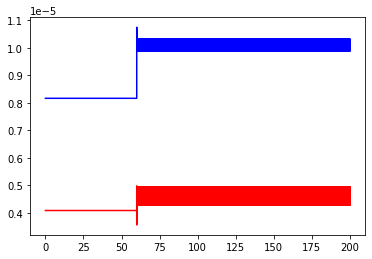

In [ ]:
matplotlib.pyplot.plot(out.t,out.y[0,:],'b',out.t,out.y[1,:],'r')

Entrada y salida del sistema (flujo qo, salida de estanque 2)

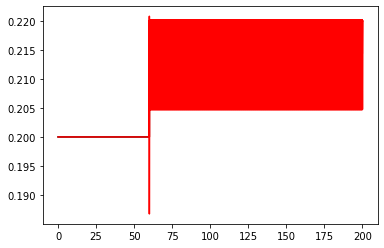

In [ ]:
matplotlib.pyplot.plot(out.t,flujo(out.t),'k',out.t,fg(out.y),'r')

Creación de sistema linealizado

In [ ]:
A=np.array([[-As*np.sqrt(rho*g)/(2*pi*R**2*np.sqrt(h10-h20)), As*np.sqrt(rho*g)/(2*pi*R**2*np.sqrt(h10-h20))],[As*np.sqrt(rho*g)/(2*pi*R**2*np.sqrt(h10-h20)),-As*np.sqrt(rho*g)/(2*pi*R**2*np.sqrt(h10-h20))+-As*np.sqrt(rho*g)/(2*np.pi*R**2*np.sqrt(h20))]])
B=np.array([[1/(pi*R**2.)],[0]])
C=np.array([[0,As*np.sqrt(rho*g)/(2*np.sqrt(h20)) ]])
C2=np.array([[1,0 ],[0,1]])
D=np.array([[0]])
D2=np.array([[0],[0]])

sys=signal.lti(A,B,C,D)
sys2=signal.lti(A,B,C2,D2)


Simulación de sistema linealizado

In [ ]:
t=np.linspace(0,Tsim,num=2000)
tout, yout, xout=signal.lsim(sys,flujo(t)-f0,t)
tout2, yout2, xout2=signal.lsim(sys2,flujo(t)-f0,t)

In [ ]:
print(tout.shape)
print(yout2.shape)
print(xout.transpose().shape)
print(out.y.shape)

(2000,)
(2000, 2)
(2, 2000)
(2, 510141)


Estados linealizados

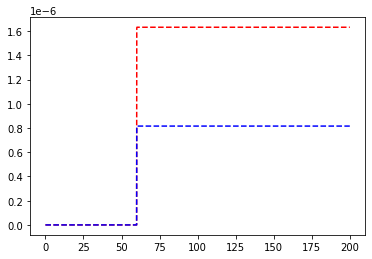

In [ ]:
matplotlib.pyplot.plot(tout,yout2[:,0],'--r',tout,yout2[:,1],'--b')

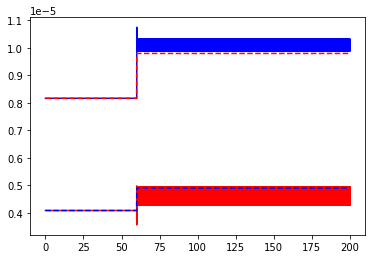

In [ ]:
matplotlib.pyplot.plot(out.t,out.y[0,:],'b',out.t,out.y[1,:],'r',tout,yout2[:,0]+h10,'--r',tout,yout2[:,1]+h20,'--b')

Salida real linealizada

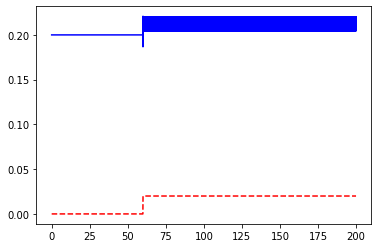

In [ ]:
matplotlib.pyplot.plot(tout,yout,'--r',out.t,fg(out.y),'b')

In [ ]:
y0=fg(h0)

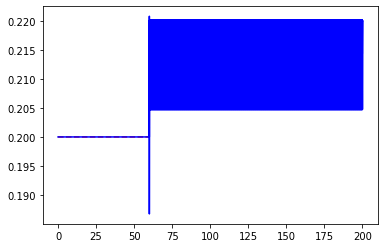

In [ ]:
matplotlib.pyplot.plot(tout,yout+y0,'--r',out.t,fg(out.y),'b')